# Necessary Imports

In [2]:
# helps for scientific computing: ndarray, etc.
import numpy as np

# helps create new data structure called data frames
import pandas as pd

# helps for plotting visualization
import matplotlib.pyplot as plt

# sklearn is for machine learning
from sklearn import svm
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import metrics

# Load data from CSV File

In [3]:
# returns data frames 
cell_df = pd.read_csv('cell_samples.csv')

cell_df.tail()

# (699, 11)
cell_df.shape

# tells how many records are present in an attribute/column
cell_df.count()

# tells how many values are present in an attribute/column
# 60:40 slightly imbalance
# 90:10 severe imbalance
# cell_df['Class'].value_counts(normalize=True)

ID             699
Clump          699
UnifSize       699
UnifShape      699
MargAdh        699
SingEpiSize    699
BareNuc        699
BlandChrom     699
NormNucl       699
Mit            699
Class          699
dtype: int64

# Distribution of the classes/target column

<AxesSubplot:xlabel='Clump', ylabel='UnifSize'>

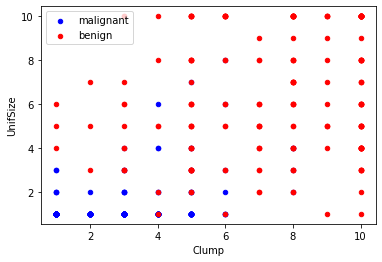

In [5]:
# get the records/rows in an attribute that satisfies the condition
# [0:200] means get 0 to 199.
malignant_df = cell_df[ cell_df['Class'] == 2 ][0:200]
benign_df = cell_df[ cell_df['Class'] == 4][0:200]

# show help of the particular method
# help(malignant_df.plot)

# creates a scatter plot, x and y values should be a valid field name
# in the dataframe
# returns axes
axes = malignant_df.plot(kind = 'scatter', x = 'Clump', y = 'UnifSize', label = 'malignant', color = 'blue')
benign_df.plot(kind = 'scatter', x = 'Clump', y = 'UnifSize', label = 'benign', color = 'red', ax = axes)

# Identifying unwanted rows

In [4]:
# verify if data types of the column is a numeric value
# we need numeric value so we can perform mathematical operations
cell_df.dtypes

# convert/transform data types of BareNuc column VALUES using .to_numeric()
# .to_numeric() returns data frames,
# pick only rows that cannot be converted into numeric by calling .notnull(),
# this, in turn, becomes a condition, thus, affects rows in an attribute BareNuc
# that satisfies the condition returned by .notnull()
cell_df = cell_df[ pd.to_numeric(cell_df['BareNuc'], errors = 'coerce').notnull() ]

# convert data type of BareNuc column ITSELF
# returns a casted
cell_df['BareNuc'] = cell_df['BareNuc'].astype('int')
cell_df.dtypes

ID             int64
Clump          int64
UnifSize       int64
UnifShape      int64
MargAdh        int64
SingEpiSize    int64
BareNuc        int32
BlandChrom     int64
NormNucl       int64
Mit            int64
Class          int64
dtype: object

# Remove unwanted columns/attributes

We now try to separate columns/attributes to independent and dependent
columns.

In [5]:
# shows the columns of the data frames
'''
['ID', 'Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize',
       'BareNuc', 'BlandChrom', 'NormNucl', 'Mit', 'Class']
'''
cell_df.columns

# Drop ID column and we dont need Class for the independent column
# Selects only columns that are in the array
feature_df = cell_df[ ['Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize',
       'BareNuc', 'BlandChrom', 'NormNucl', 'Mit'] ]
feature_df

# convert data frames to ndarray to be used in the train/test split
# independent variable, capital X means 2D array
X = np.asarray(feature_df)

# dependent variable, small y means 1D array: of the attribute column
y = np.asarray(cell_df['Class'])

# Create the Model (SVM with sklearn)

In [6]:
# hyperparameter tuning: change parameters for this model
clf = svm.SVC()

# Divide the data as Train/Test dataset

In [8]:
# this cell is now [optional]

def get_score(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    accuracy_score = metrics.accuracy_score(y_true = y_test, y_pred = predictions)
    
    return accuracy_score

def get_score_1(model, X_train, X_test, y_train, y_test, metric = 'f1_score'):
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    if metric == 'accuracy':
        pass
    if metric == 'precision':
        pass
    if metric == 'recall':
        pass
    if metric == 'f1_score':
        # class_2 is class_0 but the dataset has [2, 4] instead of [0, 1]
        # class_4 is class_1 but the dataset has [2, 4] instead of [0, 1]
        # this logic is same with:
        '''
        
        '''
        class_2 = metrics.f1_score(y_true = y_test, y_pred = predictions, pos_label = 2)
        class_4 = metrics.f1_score(y_true = y_test, y_pred = predictions, pos_label = 4)
        return (class_2 + class_4) / 2

# train_test_split()

accuracy score: 0.95

class 2 support: 79
class 4 support: 58
total support: 137

precision score for class 2: 0.94
precision score for class 4: 0.96
precision score macro average: 0.95
precision score weighted average: 0.95

recall score for class 2: 0.97
recall score for class 4: 0.91
recall score macro average: 0.94
recall score weighted average: 0.95

f1 score for class 2: 0.96
f1 score for class 4: 0.94
micro-f1 = micro-precision = micro-recall = accuracy
f1 score macro average: 0.95
f1 score weighted average: 0.95


              precision    recall  f1-score   support

           2       0.94      0.97      0.96        79
           4       0.96      0.91      0.94        58

    accuracy                           0.95       137
   macro avg       0.95      0.94      0.95       137
weighted avg       0.95      0.95      0.95       137

confusion matrix accuracy: 0.95
confusion matrix precision: 0.96
confusion matrix recall: 0.91
confusion matrix f1 score: 0.94


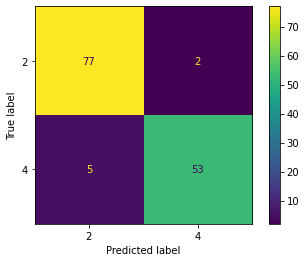

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = 0.2)

clf.fit(X_train, y_train)
pred = clf.predict(X_test)

print("accuracy score:", round(metrics.accuracy_score(y_true = y_test, y_pred = pred), 2))
print()
# precision_recall_fscore_support
prfs = metrics.precision_recall_fscore_support(y_true = y_test, y_pred = pred)
total_support = prfs[3][0] + prfs[3][1]
print("class 2 support:", prfs[3][0])
print("class 4 support:", prfs[3][1])
print("total support:", total_support)
print()
precision_score_class_2 = metrics.precision_score(y_true = y_test, y_pred = pred, pos_label = 2)
precision_score_class_4 = metrics.precision_score(y_true = y_test, y_pred = pred, pos_label = 4)
print("precision score for class 2:", round(precision_score_class_2, 2))
print("precision score for class 4:", round(precision_score_class_4, 2))
print("precision score macro average:", round((precision_score_class_4 + precision_score_class_2) / 2, 2))
print("precision score weighted average:", round((precision_score_class_2 * prfs[3][0] / total_support) + \
                                                    (precision_score_class_4 * prfs[3][1] / total_support), 2))
print()
recall_score_class_2 = metrics.recall_score(y_true = y_test, y_pred = pred, pos_label = 2)
recall_score_class_4 = metrics.recall_score(y_true = y_test, y_pred = pred, pos_label = 4)
print("recall score for class 2:", round(recall_score_class_2, 2))
print("recall score for class 4:", round(recall_score_class_4, 2))
print("recall score macro average:", round((recall_score_class_4 + recall_score_class_2) / 2, 2))
print("recall score weighted average:", round((recall_score_class_2 * prfs[3][0] / total_support) + \
                                                    (recall_score_class_4 * prfs[3][1] / total_support), 2))
print()
f1_score_class_2 = metrics.f1_score(y_true = y_test, y_pred = pred, pos_label = 2)
f1_score_class_4 = metrics.f1_score(y_true = y_test, y_pred = pred, pos_label = 4)
print("f1 score for class 2:", round(f1_score_class_2, 2))
print("f1 score for class 4:", round(f1_score_class_4, 2))
print("micro-f1 = micro-precision = micro-recall = accuracy")
print("f1 score macro average:", round((f1_score_class_4 + f1_score_class_2) / 2, 2))
print("f1 score weighted average:", round((f1_score_class_2 * prfs[3][0] / total_support) + \
                                      (f1_score_class_4 * prfs[3][1] / total_support), 2))
print()

print()
print(metrics.classification_report(y_test, y_pred = pred))


# CONFUSION MATRIX
# confusion matrix
cm = metrics.confusion_matrix(y_test, y_pred = pred)
'''
[   
    [TN, FP]
    [FN, TP]
]
'''
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [2, 4])
cm_display.plot()

TN = 77
FP = 2
FN = 5
TP = 53

print("confusion matrix accuracy:", round((TP + TN) / (TP + FP + TN + FN), 2))
print("confusion matrix precision:", round(TP / (TP + FP), 2))
print("confusion matrix recall:", round(TP / (TP + FN), 2))
print("confusion matrix f1 score:", round(TP / (TP + ((FP + FN) / 2) ), 2))

# K-Fold Cross Validation using cross_val_score

In [156]:
clf = svm.SVC()
kfold = KFold(n_splits = 10)

accuracy = metrics.make_scorer(metrics.accuracy_score)
precision = metrics.make_scorer(metrics.precision_score, average = 'macro')
recall = metrics.make_scorer(metrics.recall_score, average = 'macro')
f1 = metrics.make_scorer(metrics.f1_score, average = 'macro')

accuracy_score = cross_val_score(clf, X, y, scoring = accuracy, cv = kfold)
precision_score = cross_val_score(clf, X, y, scoring = precision, cv = kfold)
recall_score = cross_val_score(clf, X, y, scoring = recall, cv = kfold)
f1_score = cross_val_score(clf, X, y, scoring = f1, cv = kfold)

print("accuracy score:", round(accuracy_score.mean(), 2))
print("precision score:", round(precision_score.mean(), 2))
print("recall score:", round(recall_score.mean(), 2))
print("f1 score:", round(f1_score.mean(), 2))

accuracy score: 0.97
precision score: 0.96
recall score: 0.97
f1 score: 0.96


# Confusion Matrix

## confusion matrix for Kfold Cross Validation
[Plotting a Confusion Matrix from a K-Fold Cross Validation](https://towardsdatascience.com/how-to-plot-a-confusion-matrix-from-a-k-fold-cross-validation-b607317e9874)

In [37]:
#importing libraries

import copy as cp
import seaborn as sns
from typing import Tuple

In [118]:
# calculate the predicted and actual classes
# by creating a helper function

'''
cross_val_predict helper function does the ff:
    1. Takes a local (deep) copy of the machine learning algorithm (model) to 
        avoid changing the one passed in
    2. Iterates around the k cross-validation data folds (given that n_splits = k)
    3. For each of the k splits, do the ff:
        a. extracts the rows from the data for the training features, training target,
            test features, and test target
        b. appends the actual target classifications to `actual_classes`
        c. Fits the machine learning model using the training data extracted from the
            current fold
        d. uses the fitted model to predict the target classifications for the test data
            in the current fold
        e. appends the predicted classes for the current fold of test data to `predicted_classes`
    4. The helper function returns the full set of actual and predicted classes (classifications)
        that can be used to plot a confusion matrix
'''

# accepts a model, a KFold instance, two numpy arrays
# returns a Tuple containing 3 numpy arrays
def cross_val_predict(model, kfold : KFold, X : np.array, y : np.array) -> Tuple[np.array, np.array, np.array]:
    
    model_ = cp.deepcopy(model)
    
    # gets the number of classes in the column/attribute
    # should be two from [2, 4].
    no_of_classes = len(np.unique(y))
    
    # initializing empty numpy arrays to be returned
    actual_classes = np.empty([0], dtype = int)
    predicted_classes = np.empty([0], dtype = int)
    predicted_proba = np.empty([0, no_of_classes])
    
    '''
    for train_index, test_index in \ 
        kfold.split([0,1,2,3,4,5,6,7,8,9]) should
    look like the below:
    [1 2 3 4 5 6 7 8 9] [0]
    [0 2 3 4 5 6 7 8 9] [1]
    [0 1 3 4 5 6 7 8 9] [2]
    [0 1 2 4 5 6 7 8 9] [3]
    [0 1 2 3 5 6 7 8 9] [4]
    [0 1 2 3 4 6 7 8 9] [5]
    [0 1 2 3 4 5 7 8 9] [6]
    [0 1 2 3 4 5 6 8 9] [7]
    [0 1 2 3 4 5 6 7 9] [8]
    [0 1 2 3 4 5 6 7 8] [9]
    '''
    for train_index, test_index in kfold.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        # append the actual classes : [...] for this iteration
        actual_classes = np.append(actual_classes, y_test)
        
        # fit the model
        model_.fit(X_train, y_train)
        
        # predict
        predicted_classes = np.append(predicted_classes, model_.predict(X_test))
        
        # This part is really optional
        try:
            predicted_proba = np.append(predicted_proba, model_.predict_proba(X_test), axis=0)            
        except:
            predicted_proba = np.append(predicted_proba, np.zeros((len(X_test), no_of_classes), dtype=float), axis=0)
    
    return actual_classes, predicted_classes, predicted_proba
        
# cross_val_predict(svm.SVC(probability=True), KFold(n_splits = 5), X, y)
    

In [119]:
# visualize the confusion matrix by creating 
# another helper function

'''
    plot_confusion_matrix helper function uses sklearn.metrics.confusion_matrix to
    calculate the matrix followed by a seaborn `heatmap` to show it in a nice format
    that helps to fully understand the performance of the algorithm through visualization.
'''
def plot_confusion_matrix(actual_classes : np.array, predicted_classes : np.array):
    cm = metrics.confusion_matrix(y_true = actual_classes, y_pred = predicted_classes)
    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [2,4])
    cm_display.plot()

              precision    recall  f1-score   support

           2       0.98      0.97      0.98       444
           4       0.95      0.96      0.95       239

    accuracy                           0.97       683
   macro avg       0.96      0.97      0.96       683
weighted avg       0.97      0.97      0.97       683

confusion matrix accuracy: 0.97
confusion matrix precision: 0.95
confusion matrix recall: 0.96
confusion matrix f1 score: 0.95


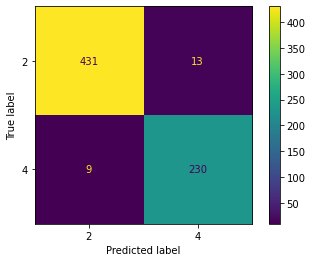

In [157]:
# call the helper functions

# classifier = svm.SVC(kernel="linear", probability=True)

actual_classes, predicted_classes, _ = cross_val_predict(clf, kfold, X, y)
print(metrics.classification_report(y_true = actual_classes, y_pred = predicted_classes))
plot_confusion_matrix(actual_classes, predicted_classes)


'''
[   
    [TN, FP]
    [FN, TP]
]
'''
TN_CV = 431
FP_CV = 13
FN_CV = 9
TP_CV = 230


print("confusion matrix accuracy:", round((TP_CV + TN_CV) / (TP_CV + FP_CV + TN_CV + FN_CV), 2))
print("confusion matrix precision:", round(TP_CV / (TP_CV + FP_CV), 2))
print("confusion matrix recall:", round(TP_CV / (TP_CV + FN_CV), 2))
print("confusion matrix f1 score:", round(TP_CV / (TP_CV + ((FP_CV + FN_CV) / 2) ), 2))
   

    
# for confusion matrix's accuracy, precision, recall, and f1 score,
# it is based on the class_4 or class_1.

# compare this with the cross_val_score from above cell,
# you'd see a rather different result because
# for the cross_val_score, we are using the average = 'macro'
# for the make_scorer(). The output we see there is the
# macro avg in the classification report.
# if we use average = 'binary', pos_label = 4 or 2,
# then that's the time we see different result because
# we are dealing with floating point values which is 
# not distinct. Because of this concept, we see a tiny
# difference between the cross_val_score with avg = binary, pos_label = 4 or 2
# and the number you see on the classification report's class_4 or class_2.